# Recycling in California Counties in 2014

Jaimie Choi

## Abstract

Currently, there is a large disparity between people's voracious apetite for single-use goods, such as plastic bags, and recycling rate nationally. For example, from 2000 to 2015, plastic manufacturing increased dramatically from 250 million tons to 448 million tons while less than 20% of plastic is recycled worldwide. With that in mind, I began to analyze how much waste does California recycle and what affects California's recycling rate by comparing counties. According to California Department of Resources Recycling and Recovery, California has "a robust recycling infrastructure" that manages even difficult materials and has several laws mandating recycling. For example, businesses and public entities are required to recycle "as much of the waste they generate as possible". These businesses also include multifamily residential dwelling of five units or more and public sector occupations. My analysis sees, given these laws, how well California recycles and what factors influence California's recycling rates across counties.

## Data

The California Department of Resources Recycling and Recovery only provides waste data set for 2014 to the public. The website gives all categories of waste use for businesses and only waste percentages for residents of each counties. Since, they do not have recycling data for residents, I will conduct analysis on what affects business recycling rates. Businesses include multifamily residential dwellings, public administrations, services, education, medical, factories, and stores. Therefore, even with a lack of residential recycling data and the fact that many people commute to different counties for work, the busniess data is sufficiently representative of a majority of the private and public sector.

I collected median income and population for each county for 2014 from the State of California Franchise Tax Board in order to analyze whether greater income is a determinant of greater recycling. In addition, I used voter registration statistics by each county as of october 20, 2014. This data was retrieved from California Secretary of State government website. This data set reveals how many are eligible to vote, and what party they are a part of or if they have no party preference. Furthermore, I acquired educational attainment data for 2014 for each counties from US Census website. Even with margins of errors, all these dataset sources are all from government websites and thus reliable.

## Background

In [1]:
import csv
import pandas as pd
import re
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import linear_model
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df = pd.read_csv('Complete_CA.csv')
df = df.drop('Unnamed: 0', 1)

**Total business waste for each counties:**

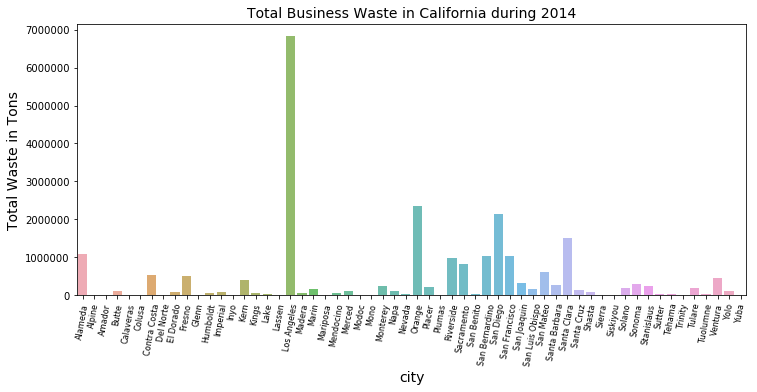

In [18]:
plt.figure(figsize=(12,5))
g = sns.barplot(df['County'], df['Total Waste'], alpha = 0.8)
plt.title('Total Business Waste in California during 2014', fontsize = 14)
plt.ylabel('Total Waste in Tons', fontsize =14)
plt.xlabel('city', fontsize=14)
plt.xticks(fontsize = 8, rotation=80)
plt.show()
#avg total waste: str(df['Total Waste'].mean()))
#df['County'].iloc[df['Total Waste'].idxmax] most waste: df['Total Waste'].max()
#df['County'].iloc[df['Total Waste'].idxmin]least waste: df['Total Waste'].min()

Notice, that the average total waste is 415,394.94 tons. Los Angeles produced the most waste, at 681,867,2.16 tons. On the other hand, Sierra produced the least waste, at 310.28 tons. This includes waste that is disposed of, recycled, composted, incinerated, and more. Now we will see how much of those goods are recycled.

**Materials that are recycled throughout California:**

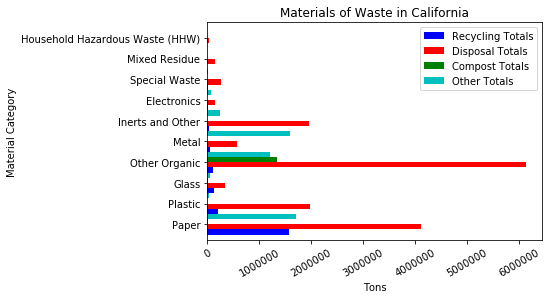

In [4]:
material = df.drop_duplicates('Recycling Totals')
material = material.sort_values('Recycling Totals', ascending=False)
y_list = ['Recycling Totals', 'Disposal Totals','Compost Totals','Other Totals']
plt.figure(figsize=(5,3))
material.plot.barh(x='Material Category', y=y_list, 
                   title= 'Materials of Waste in California', rot=0, 
                   color = ['b','r', 'g', 'c'], width= 1)
plt.xticks(rotation=30)
plt.xlabel('Tons')
plt.show()

Here, we compare the total tons of waste for each material type that are disposed, recycled, composted, and diverted in other ways such as incineration. Paper is recycled significantly more than any other material types. Yet, paper is the second most disposed material. In almost all categories, waste is mostly disposed rather than diverted from the landfills.

**Counties with greatest and least waste disposal percentage for businesses for non-organic materials:**

From the previous graph, one can see that businesses dispose organic waste significantly more than any other types of waste. However, organic materials are not recyclable but compostable. Thus, recycling percentages for each counties will be misleading, especially since some counties are very agriculturally intensive. These graphs show the percentage of non-organic waste that is sent to the landfill, since most of these wastes are recyclable- especially with California's rigorous recycling system.

In [23]:
no_org = pd.read_csv('CA_No_Organic.csv')

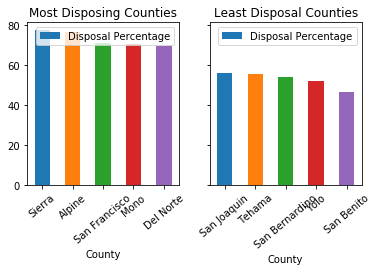

In [24]:
fig, axes = plt.subplots(sharey=True, nrows=1, ncols=2, figsize=(6,3))
disposal = no_org.drop_duplicates('Disp_perc')
disposal = disposal.sort_values('Disp_perc', ascending=False)
disposal_top = disposal[:5]
disposal_top.plot.bar(x='County', y='Disp_perc', 
                      label="Disposal Percentage", 
                      title= 'Most Disposing Counties', rot=40, ax=axes[0])
disposal_bottom = disposal[-5:]
disposal_bottom.plot.bar(x='County', y='Disp_perc', label="Disposal Percentage", 
                         title= 'Least Disposal Counties', rot=40, ax=axes[1])
plt.show()
#Avg disposal perc: disposal['Disp_perc'].mean()
#no_org['County'].iloc[no_org['Disp_perc'].idxmax] max: no_org['Disp_perc'].max()
#no_org['County'].iloc[no_org['Disp_perc'].idxmin] min: no_org['Disp_perc'].min()

Notice that the average disposal percentage is 63%. Sierra has the highest waste disposal percentage at 77.63%. San Benito has the lowest waste disposal percentage at 46.48%. These percentages indicate that almost all countries mostly dispose their non-organic trash into the landfills.

**Counties with greatest and least recycling percentage of non-organic waste for businesses:**

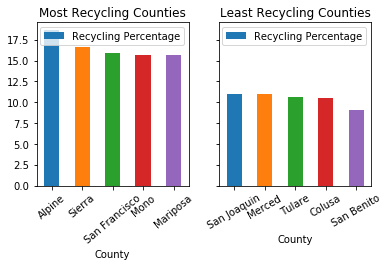

In [7]:
fig, axes = plt.subplots(sharey=True, nrows=1, ncols=2, figsize=(6,3))
recycling = no_org.drop_duplicates('Rec_perc')
recycling = recycling.sort_values('Rec_perc', ascending=False)
recycling_top = recycling[:5]
recycling_top.plot.bar(x='County', y='Rec_perc', 
                       label="Recycling Percentage",
                       title= 'Most Recycling Counties', rot=40, ax=axes[0])
recycling_bot = recycling[-5:]
recycling_bot.plot.bar(x='County', y='Rec_perc', 
                          label="Recycling Percentage", 
                          title= 'Least Recycling Counties', rot=30, 
                          ax=axes[1])
plt.show()
#Average recycling perc : recycling['Rec_perc'].mean()
#recycling_top['County'].iloc[0] - max perc: recycling_top['Rec_perc'].max()
#recycling_bot['County'].iloc[0] -min perc: recycling_bot['Rec_perc'].min()

In 2014, the average recycling percentage is 13%. Alpine has the largest recycling percentage at 18.63% while San Benito has the lowest recycling percentage at 9.06%.
<br>
Notice that almost all countries have to put most of their waste in landfills (with the average as 63%) and yet the highest recycling percentage is merely 18%. Due, to contamination of recycled goods by improper recycling, the recycling percentage is actually lower. With high use of single-stream recycling system, food contamination and improper sorting is a big issue. Clearly, in California, there is a blatant disparity between waste disposal and recycling waste. 

## Recycling Analysis

The greater the population, the more waste is produced in the counties. Here we can see the relationship between population and the county business recycling percentage. There will be margins of error since some people commute to different counties for work.

**Population versus Recycling:**

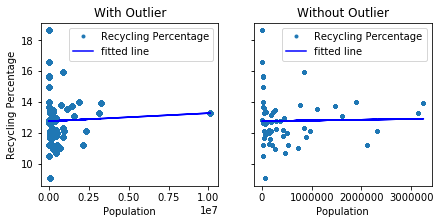

In [19]:
fig, axes = plt.subplots(sharey=True, nrows=1, ncols=2, figsize=(7,3))

vis1 = no_org.plot.scatter(x=['Population'], y='Rec_perc', ax=axes[0])
axes[0].set_ylabel('Recycling Percentage')
x0 = no_org['Population']
y0 = no_org['Rec_perc']
slope0, intercept0, r_value0, p_value0, std_err0 =scipy.stats.linregress(x0,y0)
axes[0].plot(x0,y0, '.', label = 'Recycling Percentage')
axes[0].plot(x0, intercept0 + slope0*x0, 'b', label = 'fitted line')
axes[0].set_xlabel('Population')
axes[0].legend()
axes[0].set_title('With Outlier')

ind1 = no_org.index[no_org['Population']== no_org['Population'].max()].min()
outlier1 = no_org['County'].iloc[ind1]

without_outliers = no_org[no_org['County']!= outlier1]
x=without_outliers['Population']
y=without_outliers['Rec_perc']
slope, intercept, r_value, p_value, std_err =scipy.stats.linregress(x, y)
axes[1].plot(x,y, '.', label = 'Recycling Percentage')
axes[1].plot(x, intercept + slope*x, 'b', label = 'fitted line')
axes[1].legend()
axes[1].set_xlabel('Population')
axes[1].set_title('Without Outlier')
plt.show()

Since outliers skew results when calculating the regression line by having a large residual, I omit Los Angeles in the following graphs. Los Angeles has a significantly larger population than other counties. Notice that there appears to be a tiny positive correlation between population and recycling percentages. However, there appears to be heteroskedasticity, meaning the regression model is inconsistent in its predictions. At low population level, the regression line is very inaccurate since there is a large variance of recycling percentages.

**Median income versus Recycling:**

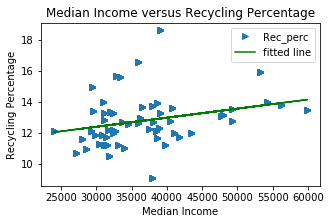

In [22]:
x1 = no_org['Median Income']
y1 = no_org['Rec_perc']
slope, intercept, r_value, p_value, std_err =scipy.stats.linregress(x1, y1)
plt.figure(figsize=(5,3))
plt.plot(x1, y1, '>')
plt.plot(x1, intercept + slope*x1, 'g', label = 'fitted line')
plt.legend()
plt.xlabel('Median Income')
plt.ylabel('Recycling Percentage')
plt.title("Median Income versus Recycling Percentage")
plt.show()

Here, even with a positive linear regression, there is clustering of recycling percentages around the 30,000 to 40,000 median income range. As a result, it is uncertain whether the linear regression provides an accurate estimation of the effect of income on recycling.

**Voting Preferences versus Recycling:**

Here I try to examine if political party affiliation, such as the Democratic Party, affects the business recycling rate.

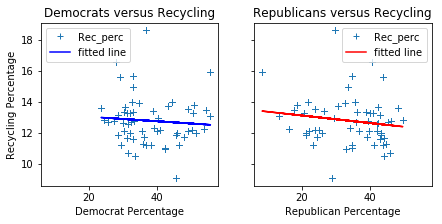

In [20]:
x2 = no_org['DV_perc']
y2 = no_org['Rec_perc']
slope, intercept, r_value, p_value, std_err =scipy.stats.linregress(x2, y2)
fig, axes = plt.subplots(sharey=True, sharex= True, nrows=1, ncols=2, figsize=(7,3))
axes[0].plot(x2, y2, '+')
axes[0].plot(x2, intercept + slope*x2, 'b', label = 'fitted line')
axes[0].legend()
axes[0].set_xlabel('Democrat Percentage')
axes[0].set_ylabel('Recycling Percentage')
axes[0].set_title("Democrats versus Recycling")
x3 = no_org['Rep_perc']
y3 = no_org['Rec_perc']
slope1, intercept1, r_value1, p_value1, std_err1 =scipy.stats.linregress(x3, y3)
axes[1].plot(x3, y3, '+')
axes[1].plot(x3, intercept1 + slope1*x3, 'r', label = 'fitted line')
axes[1].legend()
axes[1].set_xlabel('Republican Percentage')
axes[1].set_title("Republicans versus Recycling")
plt.show()

Both graphs show severe heteroskedasticity that makes the predicted regression line very unreliable. It appears that the voter party registration has very little correlation to the recycling percentage. This is interesting because the democratic party tends to push for environmental protection laws, such as increased recycling.

**Percentage of Adults holding Bachelor Degrees versus Recycling:** 

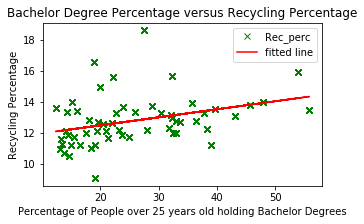

In [11]:
x5 = no_org['edu_perc']
y5 = no_org['Rec_perc']
slope, intercept, r_value, p_value, std_err =scipy.stats.linregress(x5, y5)
plt.figure(figsize=(5,3))
plt.plot(x5, y5, 'x', color = 'g')
plt.plot(x5, intercept + slope*x5, 'r', label = 'fitted line')
plt.legend()
plt.xlabel('Percentage of People over 25 years old holding Bachelor Degrees')
plt.ylabel('Recycling Percentage')
plt.title("Bachelor Degree Percentage versus Recycling Percentage")
plt.show()

Here there appears to be a positive linear relationship between percentage of people over 25 years old and recycling percentage. There is less variance in the recycling percentage, which allows us to see that the regression is more reliable in showing the correlation between education and recycling.

**Education versus Food Contamination for Recycling:**

Recycled waste is only useful in generating new goods if it has minimal contamination, especially from food. I created a limited data set that excludes wastes that are organic. I used the percentage of food that is recycled in each counties to see a correlation between education percentage and food contamination percentage.

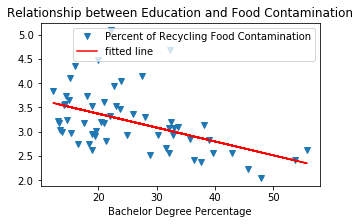

In [12]:
df_food = df[df['Material Type']== 'Food']
x_f = df_food['edu_perc']
y_f = df_food['Percent of Curbside Recycle']*100
slope, intercept, r_value, p_value, std_err =scipy.stats.linregress(x_f, y_f)
plt.figure(figsize=(5,3))
plt.plot(x_f,y_f, 'v', label = 'Percent of Recycling Food Contamination')
plt.plot(x_f, intercept + slope*x_f, 'r', label = 'fitted line')
plt.legend()
plt.xlabel('Bachelor Degree Percentage')
plt.title('Relationship between Education and Food Contamination')
plt.show()

Greater educated population seems to be significantly correlated with fewer food contamination, unlike the relationship between education attainment and recycling percentage. Even with some clustering of recycling percentages for counties with low bachelor degree percentages, counties with higher bachelor degree percentages clearly tend to have lower contamination rate.

In [13]:
no_org_sub = no_org.drop_duplicates(subset = ['DV_perc', 'edu_perc'])
X_t = no_org_sub[['DV_perc', 'edu_perc']]
Y_t = no_org_sub['Rec_perc']
regr = linear_model.LinearRegression()
regr.fit(X_t,Y_t)
model = sm.OLS(Y_t, X_t).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Rec_perc   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     405.1
Date:                Thu, 13 Dec 2018   Prob (F-statistic):           4.96e-34
Time:                        22:06:51   Log-Likelihood:                -151.09
No. Observations:                  58   AIC:                             306.2
Df Residuals:                      56   BIC:                             310.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
DV_perc        0.2648      0.036      7.452      0.0

Unfortunately, due to multicollinearity, I could not test all the different factors to see what makes a county more likely to recycle. It is probably doe to the fact that education, and income are closely related. All are known to be positively correlated with each other. Population is correlated with percentages since the denominator of percentages is approximately the population itself. However,a multivariate regression with democratic percentage and educational percentage shows that an increase in the democratic party percentage raises recycling percentage by 0.2658 percent. However, we can not conclude education percentage's effect on recycling percentage due to a relatively high P value.

## Conclusion

From running individual regressions and one multilinear regression, I infer that many factors have a correlating relationship with recycling percentage, but adjusting the factors may not significantly increase the recycling percentage. However, I have not accounted for other factors such as campaigning, proximity to oceans or landfill, and how strict the laws are in California for businesses. I also would like to see how recycling has changed over time in California, and also in other states or the US overall. This will allow a more accurate analysis of what factors impact America's efforts to recycle.

## Citations

1) Parker, L. (2018, May 16). Fast Facts About Plastic Pollution. Retrieved 
    December 8, 2018, from 
    https://news.nationalgeographic.com/2018/05/plastics-facts-infographics-ocean-pollution/
<br>
2) CalRecycle. Recycle. Retrieved December 11, 2018, from https://www.calrecycle.ca.gov/recycle
<br>
3) State of California Franchise Tax Board. Median Adjusted Gross Income (AGI) by County. Retrieved December 11, 2018, from
https://www.ftb.ca.gov/Data/Individuals/Median-income.shtml
<br>
4) Alex Padilla California Secretary of State. General Election - Statement of Vote. Retrieved December 11, 2018, from https://www.sos.ca.gov/elections/prior-elections/statewide-election-results/general-election-november-4-2014/statement-vote/
<br>
5) United States Census Bureau. Educational Attainment 2014 Table. Retrieved December 11, 2018, from
https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?src=CF
<br>